In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('./../../Desktop/final_datasetBSL.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gha
1,0.328372,0.675786,-1.260000e-06,0.243510,0.685077,-0.079807,0.162999,0.678406,-0.144272,0.148250,...,0.452556,0.650563,-0.153571,0.439319,0.699060,-0.143589,0.419265,0.733119,-0.127507,gha
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gha
3,0.364105,0.403494,-1.200000e-06,0.285039,0.368315,-0.076255,0.219778,0.324999,-0.135492,0.216152,...,0.527855,0.310567,-0.166318,0.482897,0.359421,-0.166685,0.444769,0.372329,-0.159283,gha
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,0.584438,0.794626,-1.030000e-06,0.471738,0.757052,0.025605,0.373178,0.695730,0.016862,0.280433,...,0.359318,0.456234,-0.078821,0.283418,0.470721,-0.079320,0.235358,0.507138,-0.078837,C
32559,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C
32560,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C
32561,0.792303,0.870873,-4.370000e-07,0.692224,0.856469,-0.051781,0.592246,0.784774,-0.081837,0.496547,...,0.621463,0.536904,-0.065668,0.546755,0.514563,-0.077858,0.487097,0.512590,-0.080989,C


In [20]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (32563, 64)


In [21]:
all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 8743


In [22]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
1,0.328372,0.675786,-1.260000e-06,0.243510,0.685077,-0.079807,0.162999,0.678406,-0.144272,0.148250,...,0.452556,0.650563,-0.153571,0.439319,0.699060,-0.143589,0.419265,0.733119,-0.127507,gha
3,0.364105,0.403494,-1.200000e-06,0.285039,0.368315,-0.076255,0.219778,0.324999,-0.135492,0.216152,...,0.527855,0.310567,-0.166318,0.482897,0.359421,-0.166685,0.444769,0.372329,-0.159283,gha
7,0.491813,0.669336,1.100000e-06,0.427839,0.702092,-0.048295,0.399116,0.748018,-0.094527,0.413618,...,0.594990,0.743411,-0.147777,0.574616,0.768121,-0.138458,0.552262,0.773924,-0.131722,gha
9,0.548939,0.441828,2.220000e-06,0.383396,0.440008,-0.095246,0.237401,0.472123,-0.219189,0.180243,...,0.739801,0.565696,-0.464303,0.685558,0.549388,-0.382302,0.660407,0.479998,-0.329130,gha
10,0.396751,0.493175,-9.100000e-07,0.317004,0.496282,-0.071621,0.242731,0.496907,-0.137050,0.215780,...,0.547036,0.564347,-0.159016,0.511373,0.610410,-0.133258,0.482467,0.621127,-0.109041,gha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32550,0.746494,0.532008,-1.310000e-07,0.545448,0.524227,0.092207,0.412919,0.477966,0.088750,0.319721,...,0.478048,0.342740,-0.404774,0.366275,0.326695,-0.449947,0.277104,0.310908,-0.484659,C
32553,0.557221,0.713757,3.170000e-07,0.427399,0.763223,-0.140404,0.299544,0.743475,-0.217264,0.179598,...,0.335411,0.396342,-0.050542,0.250449,0.383813,-0.055802,0.189664,0.386888,-0.053577,C
32555,0.509382,0.690363,1.510000e-07,0.409409,0.697730,-0.027140,0.316112,0.668024,-0.040957,0.227617,...,0.351730,0.381980,-0.029179,0.288498,0.355125,-0.036474,0.231869,0.342597,-0.040128,C
32558,0.584438,0.794626,-1.030000e-06,0.471738,0.757052,0.025605,0.373178,0.695730,0.016862,0.280433,...,0.359318,0.456234,-0.078821,0.283418,0.470721,-0.079320,0.235358,0.507138,-0.078837,C


In [24]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (23820, 64)


In [25]:
X = df.iloc[:, :63]
print("Features shape =", X.shape)

Y = df.iloc[:, 63]
print("Labels shape =", Y.shape)

Features shape = (23820, 63)
Labels shape = (23820,)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
svm = SVC(C=50, gamma=0.1, kernel='rbf')

In [28]:
svm.fit(x_train, y_train)

SVC(C=50, gamma=0.1)

In [29]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9810033585222502


In [30]:
y_pred = svm.predict(x_test)

In [31]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9811083123425692


In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9811083123425692, 0.9811083123425692, 0.9811083123425692)

In [33]:
import joblib
joblib.dump(svm,'./model2.pkl')

['./model2.pkl']

In [34]:
labels = sorted(list(set(df['Output'])))
labels

['C',
 'Love',
 'ca',
 'da',
 'ena',
 'fa',
 'ga',
 'gha',
 'ha',
 'ina',
 'ja',
 'ka',
 'kha',
 'la',
 'na',
 'pa',
 'ra',
 'sa',
 'space',
 'ta',
 'ya']

<AxesSubplot:title={'center':'Confusion Matrix'}>

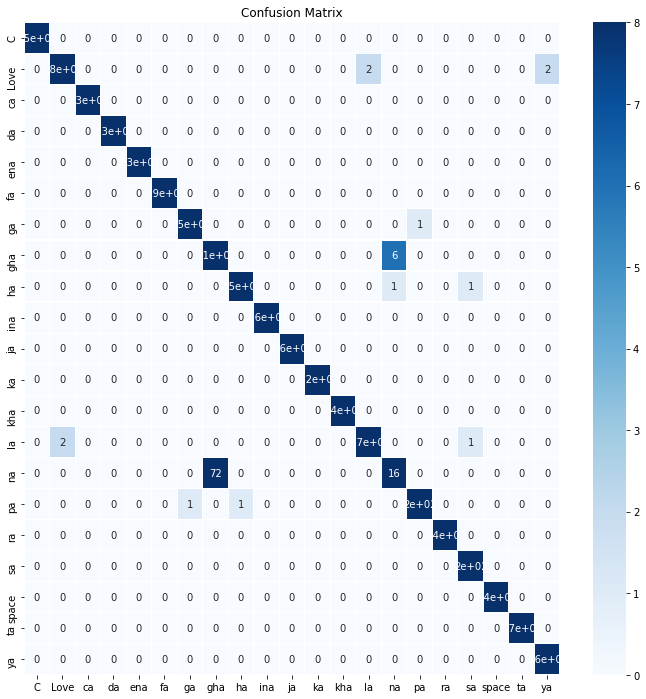

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping